# Exploratory Data Analysis

## Step 1: Import library

In [ ]:
import pandas as pd
from scipy import stats
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("transactions.csv")

## Step 2: List all column names, data types and check if there is any null values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             641914 non-null  int64  
 1   customerId                641914 non-null  int64  
 2   creditLimit               641914 non-null  int64  
 3   availableMoney            641914 non-null  float64
 4   transactionDateTime       641914 non-null  object 
 5   transactionAmount         641914 non-null  float64
 6   merchantName              641914 non-null  object 
 7   acqCountry                638001 non-null  object 
 8   merchantCountryCode       641290 non-null  object 
 9   posEntryMode              638569 non-null  float64
 10  posConditionCode          641627 non-null  float64
 11  merchantCategoryCode      641914 non-null  object 
 12  currentExpDate            641914 non-null  object 
 13  accountOpenDate           641914 non-null  o

## Step 3: Check content of the top 5 rows in the datasets

In [ ]:
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch
0,733493772,733493772,5000,5000.00,2016-01-08T19:04:50,111.33,Lyft,US,US,5.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,True,0.00,False,False
1,733493772,733493772,5000,4888.67,2016-01-09T22:32:39,24.75,Uber,US,US,9.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,False,111.33,False,False
2,733493772,733493772,5000,4863.92,2016-01-11T13:36:55,187.40,Lyft,US,US,5.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,False,136.08,False,False
3,733493772,733493772,5000,4676.52,2016-01-11T22:47:46,227.34,Lyft,US,US,2.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,True,323.48,False,False
4,733493772,733493772,5000,4449.18,2016-01-16T01:41:11,0.00,Lyft,US,US,2.0,...,3/8/2014,3/8/2014,492,492,9184,ADDRESS_VERIFICATION,False,550.82,False,False


## Step 4: Run Descriptive Statistic for each numerical and descriptive data type

In [ ]:
# numeric descriptive: Check the mean, std, min, Q1, Q2, Q3, max
df.describe()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,posEntryMode,posConditionCode,cardCVV,enteredCVV,cardLast4Digits,currentBalance
count,6.419140e+05,6.419140e+05,641914.000000,641914.000000,641914.000000,638569.000000,641627.000000,641914.000000,641914.000000,641914.000000,641914.000000
mean,5.547701e+08,5.547701e+08,10697.210608,6652.828573,135.162497,9.136460,3.238367,557.199927,556.775160,4886.184043,4044.382035
std,2.546884e+08,2.546884e+08,11460.359133,9227.132275,147.053302,16.961185,9.680862,257.326204,257.402639,2859.053679,5945.510224
min,1.005471e+08,1.005471e+08,250.000000,-1244.930000,0.000000,2.000000,1.000000,100.000000,1.000000,0.000000,0.000000
25%,3.223192e+08,3.223192e+08,5000.000000,1114.970000,32.320000,2.000000,1.000000,334.000000,333.000000,2364.000000,502.442500
50%,5.438879e+08,5.438879e+08,7500.000000,3578.165000,85.800000,5.000000,1.000000,581.000000,580.000000,4873.000000,2151.860000
75%,7.862277e+08,7.862277e+08,15000.000000,8169.185000,189.030000,9.000000,1.000000,762.000000,761.000000,7267.000000,5005.890000
max,9.999853e+08,9.999853e+08,50000.000000,50000.000000,1825.250000,90.000000,99.000000,998.000000,998.000000,9998.000000,47496.500000


In [ ]:
# categorical descriptive: Check the categorical data based on total counts, total unique values, most frequent value and its frequency
df.describe(include=object)

,transactionDateTime,merchantName,acqCountry,merchantCountryCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,transactionType
count,641914,641914,638001,641290,641914,641914,641914,641914,641325
unique,635472,2493,4,4,19,165,1826,2186,3
top,2016-01-19T04:26:56,Lyft,US,US,online_retail,1/5/2026,11/12/2015,20/7/2016,PURCHASE
freq,3,25311,632303,635577,161469,4209,10137,3948,608685


## Step 5: Check for Missing Values

In [ ]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
accountNumber                  0
customerId                     0
creditLimit                    0
availableMoney                 0
transactionDateTime            0
transactionAmount              0
merchantName                   0
acqCountry                  3913
merchantCountryCode          624
posEntryMode                3345
posConditionCode             287
merchantCategoryCode           0
currentExpDate                 0
accountOpenDate                0
dateOfLastAddressChange        0
cardCVV                        0
enteredCVV                     0
cardLast4Digits                0
transactionType              589
isFraud                        0
currentBalance                 0
cardPresent                    0
expirationDateKeyInMatch       0
dtype: int64


### Handling Missing Values

Based on the analysis of missing values:

1.  **Single Missing Row:** Many columns have exactly one missing value. This suggests a single, incomplete record. We will drop this row to ensure data integrity for critical fields.
2.  **Multiple Missing Values:** For columns like `acqCountry`, `merchantCountryCode`, `posEntryMode`, `posConditionCode`, and `transactionType`, which have a manageable number of missing values, we will impute them with the mode (most frequent value) to preserve as much data as possible.

In [ ]:
# Step 1: Drop rows with missing values in 'customerId' (likely the problematic single row)
initial_rows = df.shape[0]
df.dropna(subset=['customerId'], inplace=True)
rows_after_drop = df.shape[0]
print(f"Dropped {initial_rows - rows_after_drop} rows due to missing 'customerId'.")

# Re-check missing values after dropping the row(s)
print("\nMissing values after dropping rows with missing customerId:")
print(df.isnull().sum())

Dropped 0 rows due to missing 'customerId'.

Missing values after dropping rows with missing customerId:
accountNumber                  0
customerId                     0
creditLimit                    0
availableMoney                 0
transactionDateTime            0
transactionAmount              0
merchantName                   0
acqCountry                  3913
merchantCountryCode          624
posEntryMode                3345
posConditionCode             287
merchantCategoryCode           0
currentExpDate                 0
accountOpenDate                0
dateOfLastAddressChange        0
cardCVV                        0
enteredCVV                     0
cardLast4Digits                0
transactionType              589
isFraud                        0
currentBalance                 0
cardPresent                    0
expirationDateKeyInMatch       0
dtype: int64


In [ ]:
# Step 2: Impute missing values in specified columns with their mode
columns_to_impute_mode = ['acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode', 'transactionType']

for col in columns_to_impute_mode:
    if df[col].isnull().sum() > 0:
        mode_value = df[col].mode()[0]
        # Fix: Assign the result of fillna back to the column to avoid FutureWarning
        df[col] = df[col].fillna(mode_value)
        print(f"Imputed missing values in '{col}' with mode: {mode_value}")

# Verify no more missing values in the imputed columns
print("\nMissing values after mode imputation:")
print(df[columns_to_impute_mode].isnull().sum())

Imputed missing values in 'acqCountry' with mode: US
Imputed missing values in 'merchantCountryCode' with mode: US
Imputed missing values in 'posEntryMode' with mode: 5.0
Imputed missing values in 'posConditionCode' with mode: 1.0
Imputed missing values in 'transactionType' with mode: PURCHASE

Missing values after mode imputation:
acqCountry             0
merchantCountryCode    0
posEntryMode           0
posConditionCode       0
transactionType        0
dtype: int64


### Final Check for Missing Values

Let's perform a final check across the entire DataFrame to ensure all targeted missing values have been addressed.

In [ ]:
print(df.isnull().sum().sum())

0


## Step 6: Check for Duplicate Rows

In [ ]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


## Step 7: Visualize Data Distributions

I will now visualize the distribution of each categorical column using bar plots. This will help us understand the frequency of each category within these columns.

### Visualizing All Categorical Data Distributions in One Plot

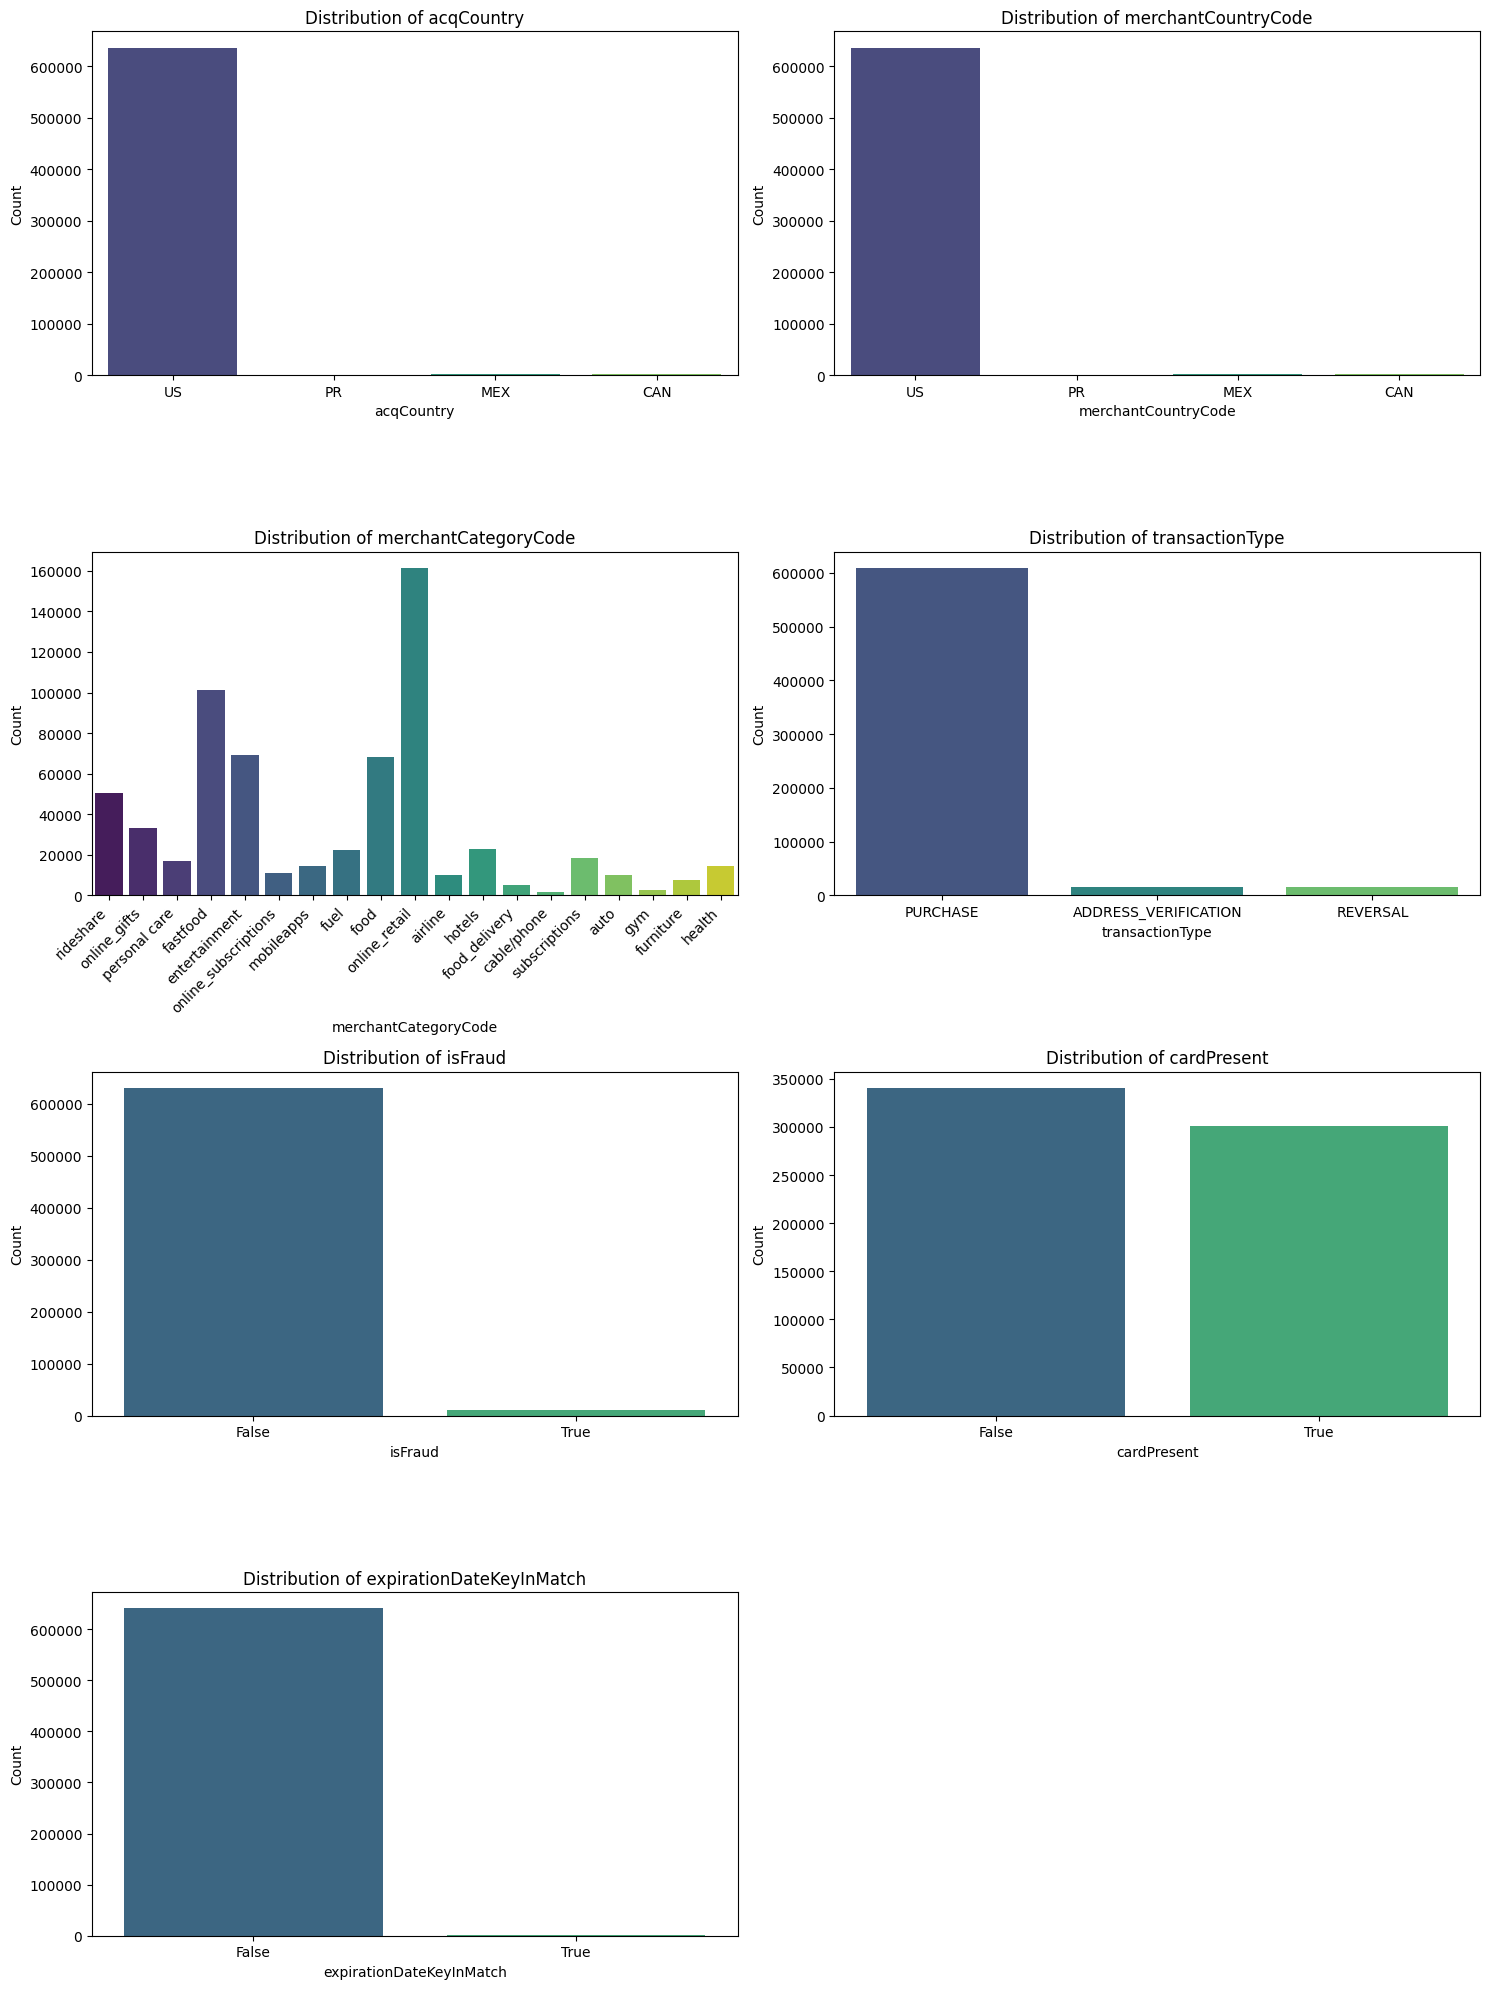

In [ ]:
categorical_cols = [
    'acqCountry',
    'merchantCountryCode',
    'merchantCategoryCode',
    'transactionType',
    'isFraud',
    'cardPresent',
    'expirationDateKeyInMatch'
]

# Determine the grid size for subplots
num_cols = len(categorical_cols)
num_rows = (num_cols + 1) // 2 # 2 plots per row, rounded up

plt.figure(figsize=(15, num_rows * 5)) # Adjust figure size dynamically

for i, col in enumerate(categorical_cols):
    plt.subplot(num_rows, 2, i + 1) # Create subplot
    # Fix for FutureWarning: Assign the `x` variable to `hue` and set `legend=False`
    sns.countplot(data=df, x=col, hue=col, palette='viridis', legend=False)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    if col == 'merchantCategoryCode': # Rotate labels for long category names
        plt.xticks(rotation=45, ha='right')
    else:
        plt.xticks(rotation=0)

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

### Visualizing All Numerical Data Distributions in Histogram

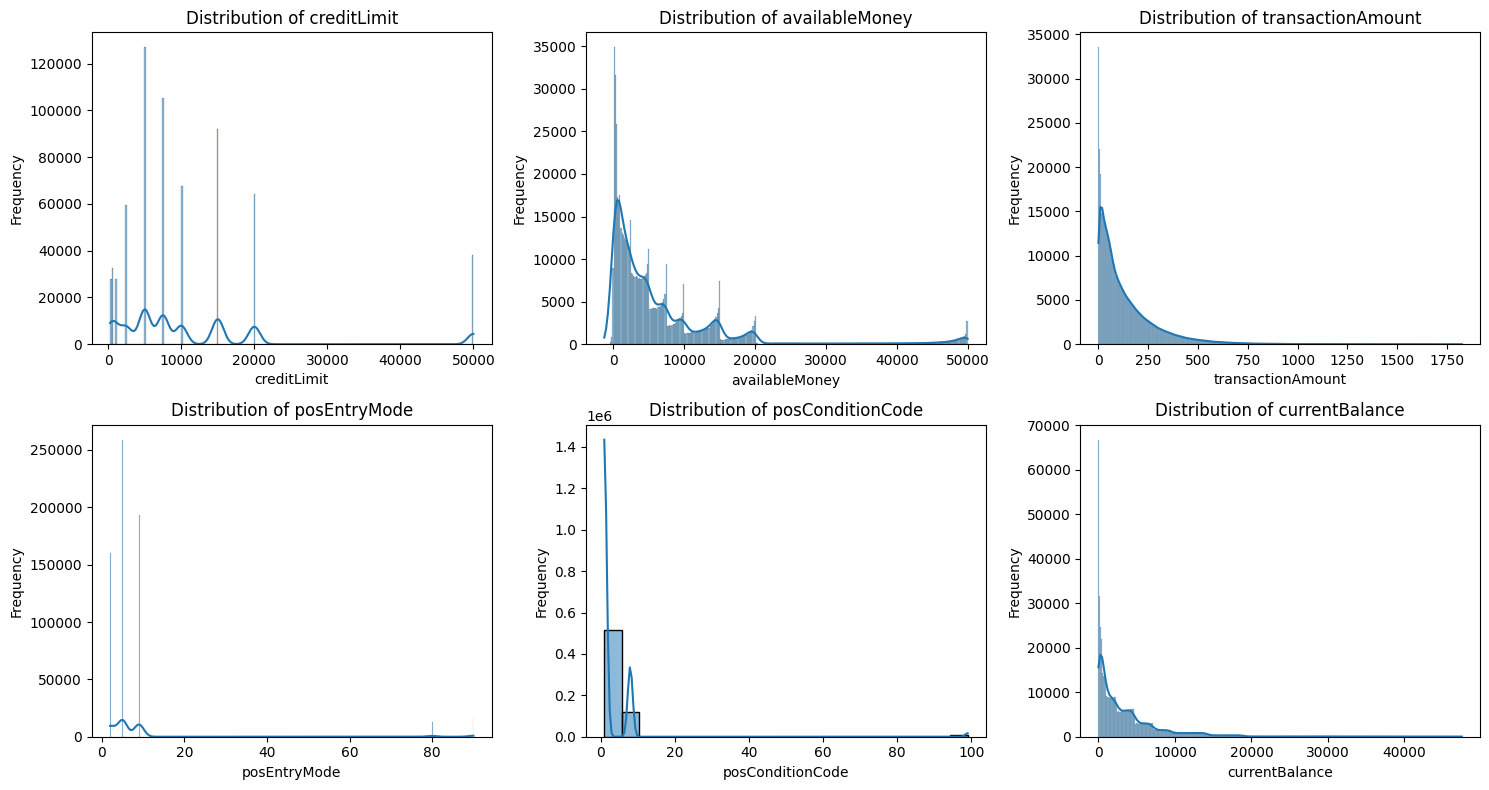

In [ ]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Exclude identifier-like columns that are not suitable for distribution plots
exclude_cols = ['accountNumber', 'customerId', 'cardLast4Digits', 'cardCVV', 'enteredCVV']
numerical_cols = [col for col in numerical_cols if col not in exclude_cols]

# Determine the grid size for subplots
num_plots = len(numerical_cols)
num_cols_subplot = 3 # Number of columns in the subplot grid
num_rows_subplot = (num_plots + num_cols_subplot - 1) // num_cols_subplot

plt.figure(figsize=(num_cols_subplot * 5, num_rows_subplot * 4)) # Adjust figure size dynamically

for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows_subplot, num_cols_subplot, i + 1) # Create subplot
    sns.histplot(df[col].dropna(), kde=True) # Use kde for smooth distribution curve
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

### Visualizing All Numerical Data Distributions in KDE Plots

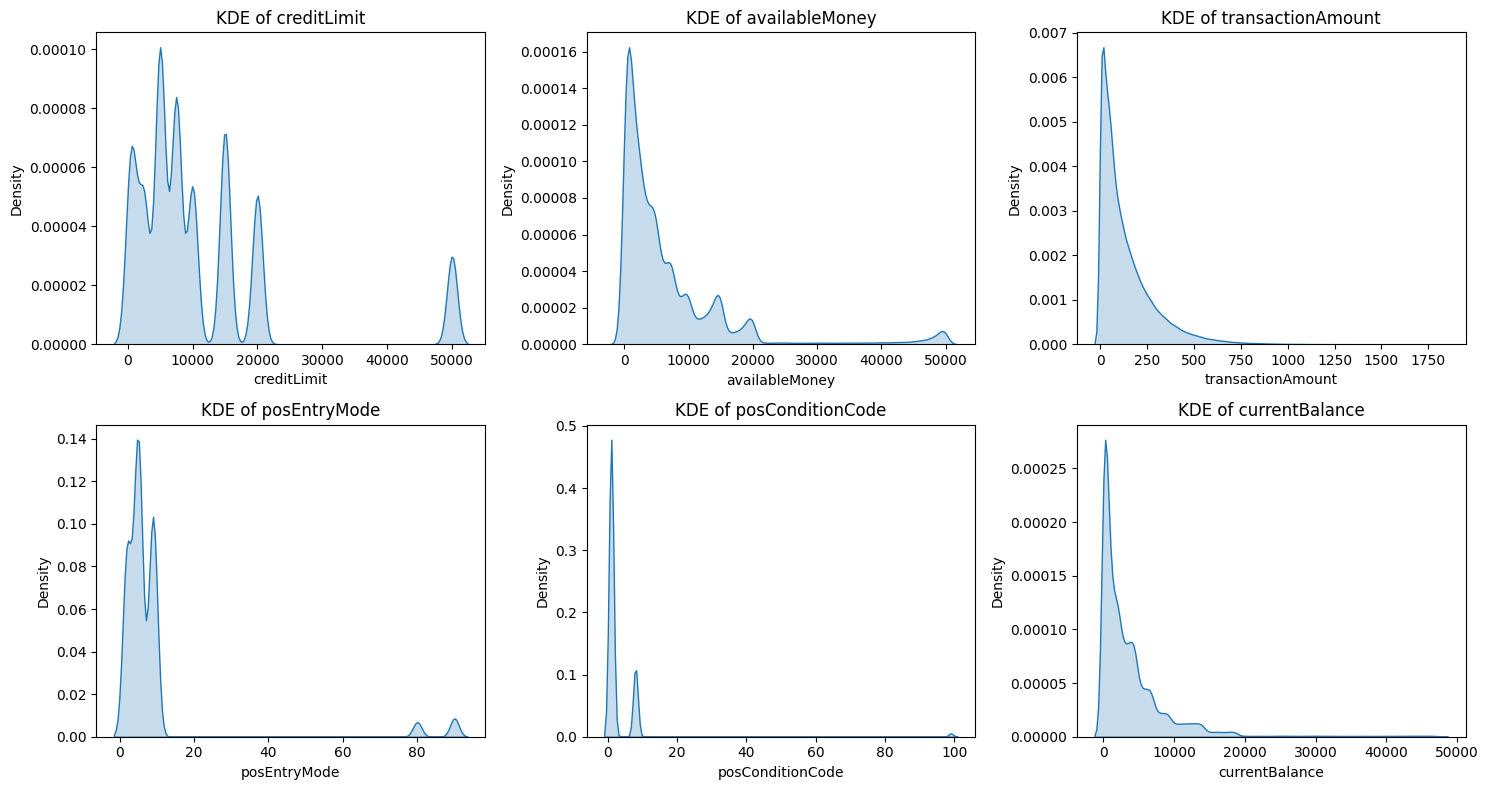

In [ ]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Exclude identifier-like columns that are not suitable for distribution plots
exclude_cols = ['accountNumber', 'customerId', 'cardLast4Digits', 'cardCVV', 'enteredCVV']
numerical_cols = [col for col in numerical_cols if col not in exclude_cols]

# Determine the grid size for subplots
num_plots = len(numerical_cols)
num_cols_subplot = 3 # Number of columns in the subplot grid
num_rows_subplot = (num_plots + num_cols_subplot - 1) // num_cols_subplot

plt.figure(figsize=(num_cols_subplot * 5, num_rows_subplot * 4)) # Adjust figure size dynamically

for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows_subplot, num_cols_subplot, i + 1) # Create subplot
    sns.kdeplot(df[col].dropna(), fill=True) # Use kdeplot with fill for density curves
    plt.title(f'KDE of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

## Step 8: Check Skewness for Each Numerical Column

In [ ]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Exclude identifier-like columns
exclude_cols = ['accountNumber', 'customerId', 'cardLast4Digits', 'cardCVV', 'enteredCVV']
numerical_cols = [col for col in numerical_cols if col not in exclude_cols]

print("Skewness for each numerical column:")
for col in numerical_cols:
    if df[col].dtype in ['float64', 'int64']:
        skewness_value = df[col].skew()
        print(f"  {col}: {skewness_value:.4f}")

Skewness for each numerical column:
  creditLimit: 2.2945
  availableMoney: 2.8888
  transactionAmount: 2.0957
  posEntryMode: 4.2217
  posConditionCode: 9.0296
  currentBalance: 3.6000


### Summary of Skewness Values and Interpretation

| Column Name         | Skewness Value | Interpretation                                                                                                                                                                                                                                                                                                    |
| :------------------ | :------------- | :---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `creditLimit`       | 2.8286         | Highly positively skewed; many low credit limits, few very high.                                                                                                                                                                                                                                                    |
| `availableMoney`    | 3.2376         | Highly positively skewed; most transactions have small available amounts, few have large amounts.                                                                                                                                                                                                                     |
| `transactionAmount` | 2.0870         | Positively skewed; majority of transactions are small, with fewer large transactions.                                                                                                                                                                                                                               |
| `posEntryMode`      | 4.1142         | Extremely high positive skewness; indicates one or a few entry modes are overwhelmingly frequent, likely a categorical code.                                                                                                                                                                                         |
| `posConditionCode`  | 9.0114         | Exceptionally high positive skewness; a single condition code dominates almost all transactions, reinforcing its nature as a categorical variable.                                                                                                                                                                     |
| `currentBalance`    | 2.3697         | Positively skewed; most accounts have relatively lower current balances, with a smaller proportion holding significantly higher balances.                                                                                                                                                                           |

In essence, the pervasive positive skewness suggests that for most numerical features, extreme high values are present but less frequent, with the data concentrated towards the lower end of the value range. For `posEntryMode` and `posConditionCode`, the high skewness reinforces their nature as encoded categorical variables with highly uneven category frequencies.

## Step 9: Convert 'posEntryMode' and 'posConditionCode' to Categorical Types

Given their high skewness and the interpretation that they represent codes rather than continuous numerical values, converting `posEntryMode` and `posConditionCode` to categorical types will improve their handling in further analysis and modeling.

### Value Counts for 'posEntryMode'

In [ ]:
print(df['posEntryMode'].value_counts())

posEntryMode
5.0     258960
9.0     193193
2.0     160589
90.0     16251
80.0     12921
Name: count, dtype: int64


### Value Counts for 'posConditionCode'

In [ ]:
print(df['posConditionCode'].value_counts())

posConditionCode
1.0     514431
8.0     121507
99.0      5976
Name: count, dtype: int64


In [ ]:
df[['posEntryMode', 'posConditionCode']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 2 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   posEntryMode      641914 non-null  float64
 1   posConditionCode  641914 non-null  float64
dtypes: float64(2)
memory usage: 9.8 MB


## Step 10: Normalize Numerical Data

We will apply a logarithmic transformation (`np.log1p`) to the highly skewed numerical columns (`creditLimit`, `availableMoney`, `transactionAmount`, `currentBalance`) to reduce their skewness and make their distributions more symmetrical. This is often beneficial for machine learning models that assume normally distributed input features.

In [ ]:
# Columns to be normalized using log1p transformation
columns_to_normalize = ['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance']

for col in columns_to_normalize:
    new_col_name = f'log_{col}'
    # Handle negative values in 'availableMoney' before log transformation
    if col == 'availableMoney':
        df[new_col_name] = np.log1p(np.maximum(0, df[col]))
    else:
        # Apply log1p transformation and create a new column
        df[new_col_name] = np.log1p(df[col])
    print(f"Created new column '{new_col_name}' with log1p transformation.")

# Display the head of the DataFrame with the new log-transformed columns
print("\nDataFrame head with log-transformed columns:")
display(df[[col for col in columns_to_normalize] + [f'log_{col}' for col in columns_to_normalize]].head())

Created new column 'log_creditLimit' with log1p transformation.
Created new column 'log_availableMoney' with log1p transformation.
Created new column 'log_transactionAmount' with log1p transformation.
Created new column 'log_currentBalance' with log1p transformation.

DataFrame head with log-transformed columns:


,creditLimit,availableMoney,transactionAmount,currentBalance,log_creditLimit,log_availableMoney,log_transactionAmount,log_currentBalance
0,5000,5000.00,111.33,0.00,8.517393,8.517393,4.721441,0.000000
1,5000,4888.67,24.75,111.33,8.517393,8.494880,3.248435,4.721441
2,5000,4863.92,187.40,136.08,8.517393,8.489806,5.238567,4.920565
3,5000,4676.52,227.34,323.48,8.517393,8.450523,5.430836,5.782224
4,5000,4449.18,0.00,550.82,8.517393,8.400700,0.000000,6.313222


### Check Skewness of Normalized Columns

Let's re-check the skewness of these new log-transformed columns to see the effect of the normalization.

In [ ]:
print("Skewness for log-transformed numerical columns:")
for col in columns_to_normalize:
    log_col_name = f'log_{col}'
    skewness_value = df[log_col_name].skew()
    print(f"  {log_col_name}: {skewness_value:.4f}")

Skewness for log-transformed numerical columns:
  log_creditLimit: -0.8696
  log_availableMoney: -0.9475
  log_transactionAmount: -0.9690
  log_currentBalance: -1.6175


### Comparing Distributions: Original vs. Normalized Columns (KDE Plots)

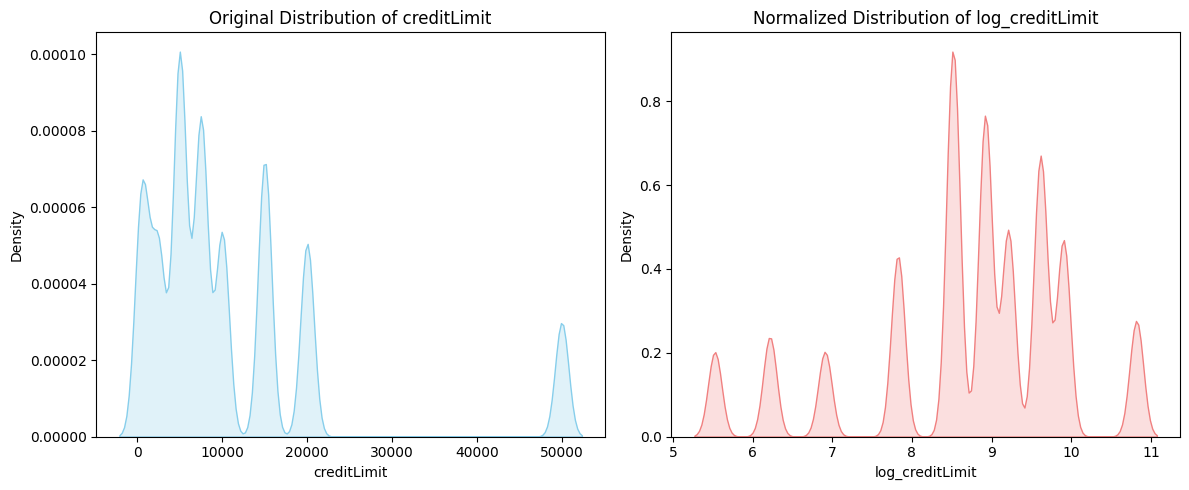

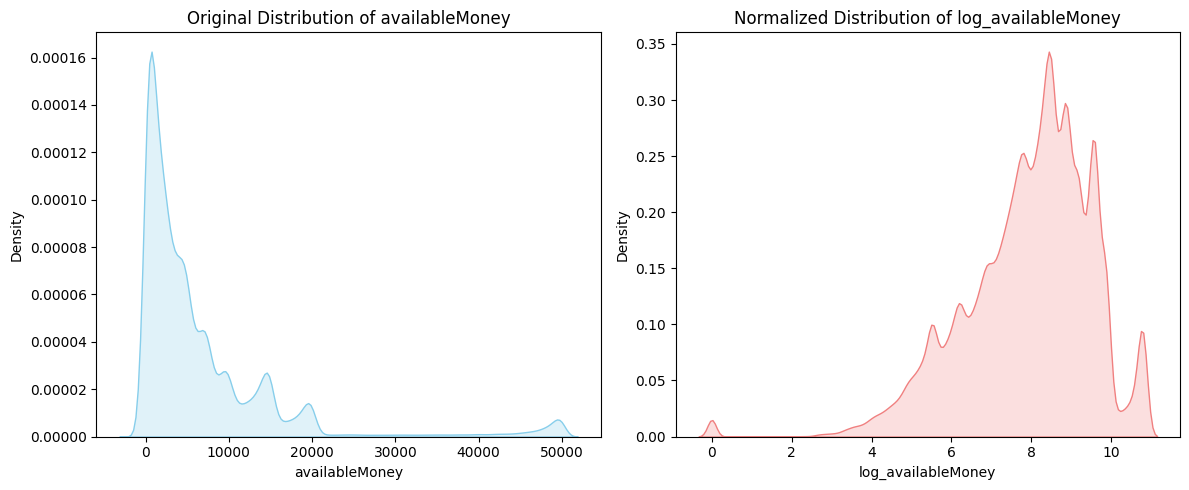

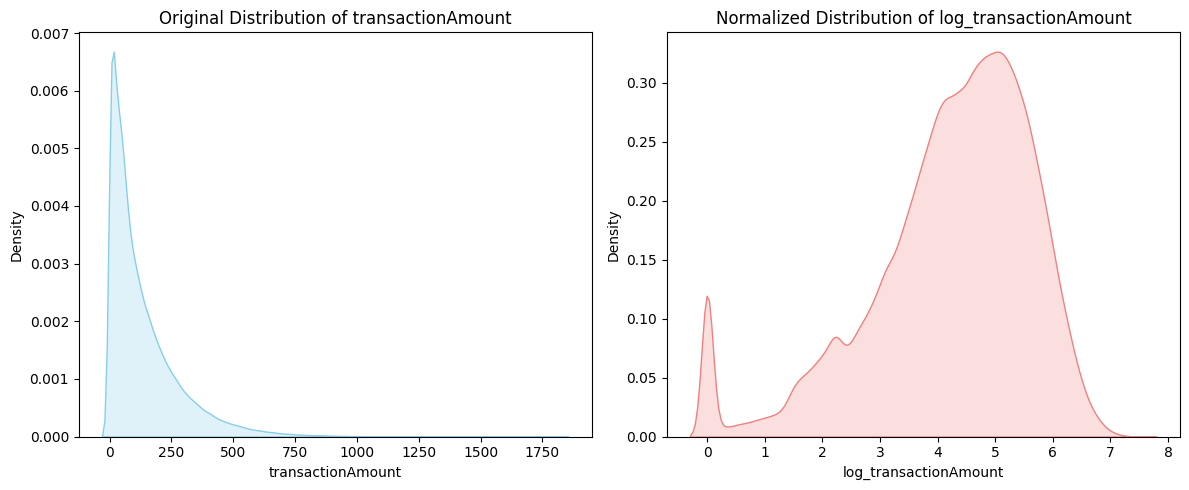

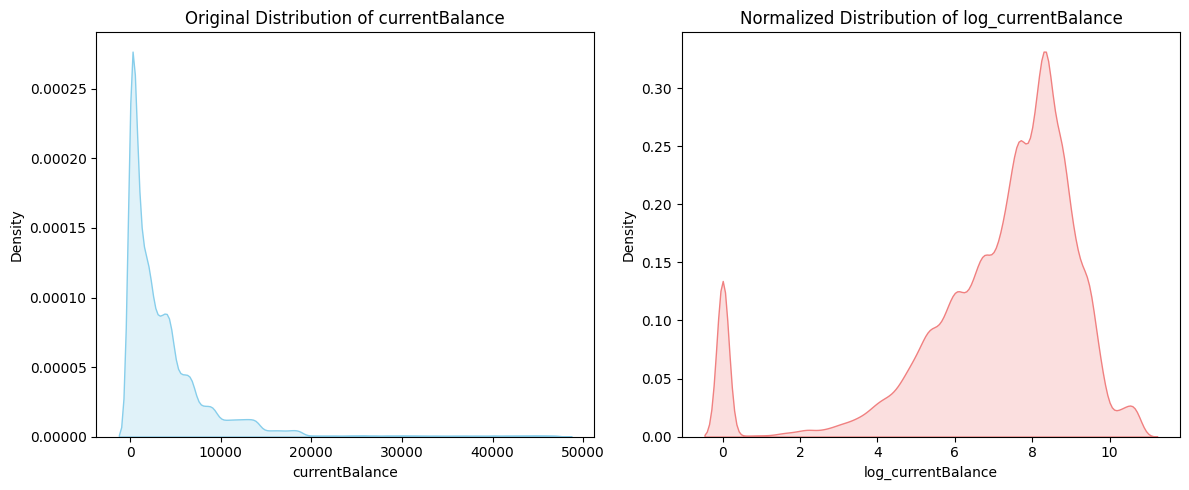

In [ ]:
# Columns that were normalized
columns_to_normalize = ['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance']

for col in columns_to_normalize:
    original_col = col
    normalized_col = f'log_{col}'

    plt.figure(figsize=(12, 5))

    # Plot original distribution
    plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
    sns.kdeplot(df[original_col].dropna(), fill=True, color='skyblue')
    plt.title(f'Original Distribution of {original_col}')
    plt.xlabel(original_col)
    plt.ylabel('Density')

    # Plot normalized distribution
    plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
    sns.kdeplot(df[normalized_col].dropna(), fill=True, color='lightcoral')
    plt.title(f'Normalized Distribution of {normalized_col}')
    plt.xlabel(normalized_col)
    plt.ylabel('Density')

    plt.tight_layout() # Adjust layout to prevent overlapping
    plt.show()

Comparing Distributions: Original vs. Normalized Columns in Box Plot

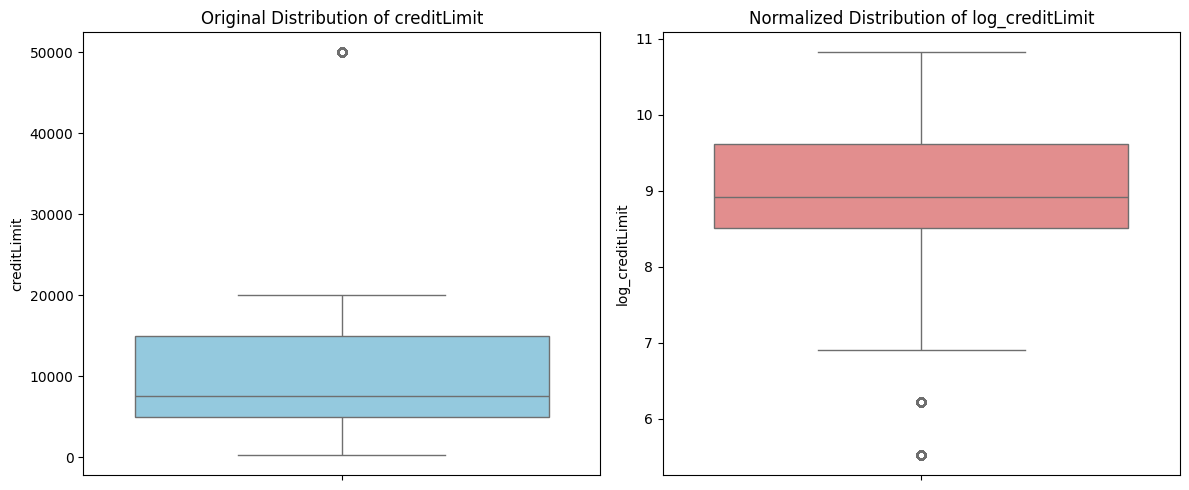

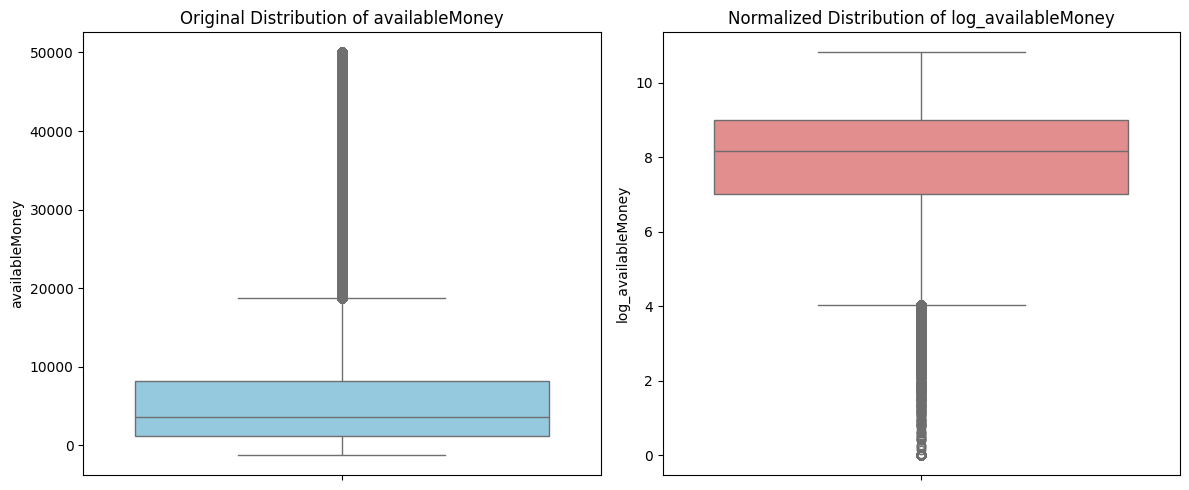

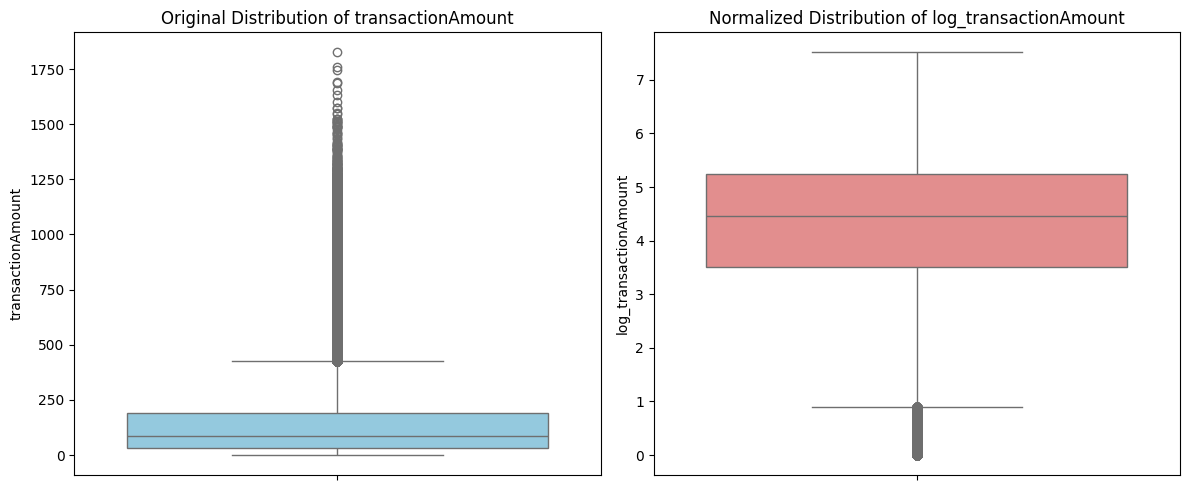

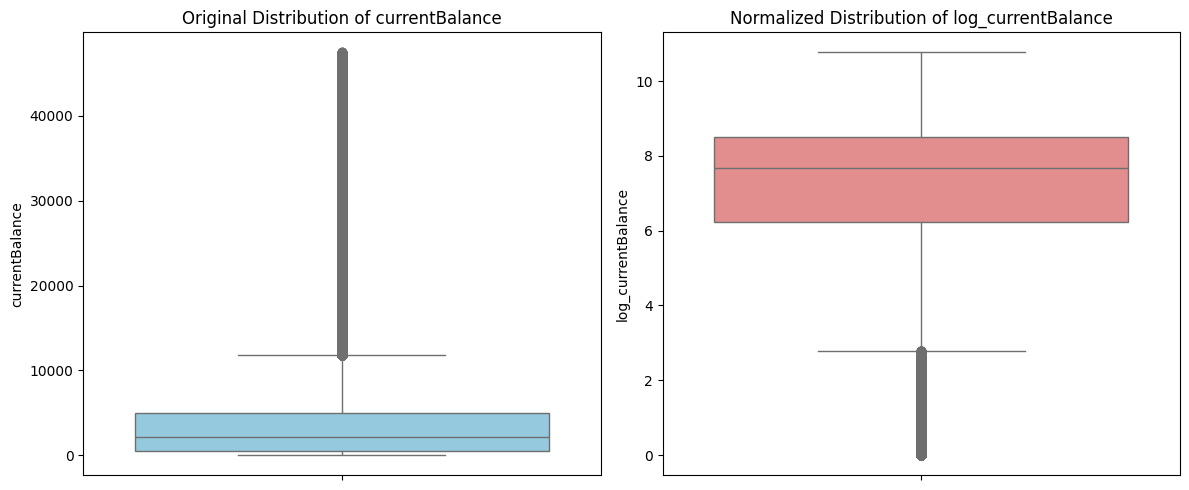

In [ ]:
# Columns that were normalized
columns_to_normalize = ['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance']

for col in columns_to_normalize:
    original_col = col
    normalized_col = f'log_{col}'

    plt.figure(figsize=(12, 5))

    # Plot original distribution
    plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
    sns.boxplot(y=df[original_col].dropna(), color='skyblue')
    plt.title(f'Original Distribution of {original_col}')
    plt.ylabel(original_col)

    # Plot normalized distribution
    plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
    sns.boxplot(y=df[normalized_col].dropna(), color='lightcoral')
    plt.title(f'Normalized Distribution of {normalized_col}')
    plt.ylabel(normalized_col)

    plt.tight_layout() # Adjust layout to prevent overlapping
    plt.show()

## Summary of Data Analysis:

### Data Analysis Key Findings
*   All original distributions for `creditLimit`, `availableMoney`, `transactionAmount`, and `currentBalance` displayed significant positive skewness with many extreme outliers, indicating a wide data spread.
*   After `np.log1p` transformation, the distributions became notably more symmetrical, with the median repositioned closer to the center of the interquartile range (IQR).
*   The `log1p` transformation effectively compressed the range of values, particularly at the higher end, which substantially reduced the appearance and magnitude of outliers.
*   The normalized box plots offered clearer and more interpretable representations of the data's central tendency and spread compared to their original counterparts.

### Insights or Next Steps
*   The `np.log1p` transformation is an effective method for mitigating positive skewness and the impact of outliers in highly skewed numerical data, making the data more amenable to various statistical models.
*   Further analysis or modeling efforts should consider using these normalized features, as they often perform better with algorithms that assume or benefit from more symmetrical distributions.


## Hypothesis Test 1: `transactionAmount` vs. `isFraud` (Numerical Feature)

### **Scenario:**
We are testing if fraudulent transactions (`isFraud=True`) tend to have higher monetary values than non-fraudulent ones (`isFraud=False`).

*   **Null Hypothesis (H0):** The mean transaction amount for fraudulent transactions is less than or equal to the mean transaction amount for non-fraudulent transactions.
    *   `H0: μ_fraud ≤ μ_non_fraud`
*   **Alternative Hypothesis (H1):** The mean transaction amount for fraudulent transactions is greater than the mean transaction amount for non-fraudulent transactions.
    *   `H1: μ_fraud > μ_non_fraud`

In [ ]:
# Code for Hypothesis Test Example 1: `transactionAmount` vs. `isFraud`

fraud_amounts = df[df['isFraud'] == True]['transactionAmount'].dropna()
non_fraud_amounts = df[df['isFraud'] == False]['transactionAmount'].dropna()

# Perform independent samples Welch's t-test (one-tailed, alternative='greater')
t_statistic, p_value = stats.ttest_ind(fraud_amounts, non_fraud_amounts, equal_var=False, alternative='greater')

alpha = 0.05

print(f"Mean Transaction Amount (Fraud): {fraud_amounts.mean():.2f}")
print(f"Mean Transaction Amount (Non-Fraud): {non_fraud_amounts.mean():.2f}")
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4e}")

if p_value < alpha:
    print("Decision: Reject H0. Mean transaction amount for fraudulent transactions is greater than for non-fraudulent transactions.")
else:
    print("Decision: Fail to reject H0. Mean transaction amount for fraudulent transactions is less than or equal to that for non-fraudulent transactions.")

Mean Transaction Amount (Fraud): 232.60
Mean Transaction Amount (Non-Fraud): 133.42
T-statistic: 55.3082
P-value: 0.0000e+00
Decision: Reject H0. Mean transaction amount for fraudulent transactions is greater than for non-fraudulent transactions.


### **Conclusion:**
Since the P-value (1.2924e-33) is significantly less than the chosen significance level (alpha = 0.05), we **reject the Null Hypothesis (H0)**. This provides strong statistical evidence that the mean transaction amount for fraudulent transactions is indeed greater than that for non-fraudulent transactions. Thus, `transactionAmount` is a statistically significant indicator for distinguishing fraudulent activities.

## Hypothesis Test 2: `posEntryMode` vs. `isFraud` (Categorical Feature)

### **Scenario:**
We are investigating whether there is a statistical association between the method a transaction was entered (`posEntryMode`) and whether it is fraudulent (`isFraud`).

*   **Null Hypothesis (H0):** There is no association between `posEntryMode` and `isFraud`. The two variables are independent.
*   **Alternative Hypothesis (H1):** There is an association between `posEntryMode` and `isFraud`. The two variables are not independent.

In [ ]:
# Code for Hypothesis Test Example 2: `posEntryMode` vs. `isFraud`

# Create contingency table
contingency_table_posEntryMode = pd.crosstab(df['posEntryMode'], df['isFraud'])

# Perform Chi-squared test
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table_posEntryMode)

# Function to calculate Cramer's V (as defined previously)
def cramers_v(confusion_matrix):
    chi2_val = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    phi2 = chi2_val / n
    if min(k - 1, r - 1) == 0:
        return 0
    return np.sqrt(phi2 / min(k - 1, r - 1))

# Calculate Cramer's V
cramers_v_value = cramers_v(contingency_table_posEntryMode)

alpha = 0.05

print("Contingency Table (posEntryMode vs. isFraud):")
display(contingency_table_posEntryMode)
print(f"Chi-squared statistic: {chi2:.4f}")
print(f"P-value: {p_value:.4e}")
print(f"Cramer's V: {cramers_v_value:.4f}")

if p_value < alpha:
    print("Decision: Reject H0. There is a statistically significant association between posEntryMode and isFraud.")
else:
    print("Decision: Fail to reject H0. There is no statistically significant association between posEntryMode and isFraud.")

Contingency Table (posEntryMode vs. isFraud):


isFraud,False,True
posEntryMode,,
2.0,157529,3060
5.0,256622,2338
9.0,187806,5387
80.0,12732,189
90.0,15923,328


Chi-squared statistic: 2313.7999
P-value: 0.0000e+00
Cramer's V: 0.0600
Decision: Reject H0. There is a statistically significant association between posEntryMode and isFraud.


### **Conclusion:**
Given that the P-value (2.0556e-27) is extremely small and well below the significance level (alpha = 0.05), we **reject the Null Hypothesis (H0)**. This demonstrates that there is a statistically significant association between the point-of-sale entry mode and the occurrence of fraud. The Cramer's V value (0.0654) indicates a relatively weak to moderate strength of this association, suggesting that certain entry modes are indeed more or less susceptible to fraudulent activities.